In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("homework.csv")
df.head()

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes


In [3]:
df.isna().sum()

outlook        0
temperature    0
humidity       0
windy          0
play           0
dtype: int64

In [4]:
df.dtypes

outlook        object
temperature     int64
humidity        int64
windy            bool
play           object
dtype: object

In [5]:
df.windy.value_counts()

False    8
True     6
Name: windy, dtype: int64

In [6]:
df.play.value_counts()

yes    9
no     5
Name: play, dtype: int64

In [7]:
df.outlook.value_counts()

sunny       5
rainy       5
overcast    4
Name: outlook, dtype: int64

In [8]:
df = pd.get_dummies(df , columns= ['outlook' , 'windy' , 'play'])
df.drop(['play_no','windy_False'] , axis = 1 , inplace=True)
df

,temperature,humidity,outlook_overcast,outlook_rainy,outlook_sunny,windy_True,play_yes
0,85,85,0,0,1,0,0
1,80,90,0,0,1,1,0
2,83,86,1,0,0,0,1
3,70,96,0,1,0,0,1
4,68,80,0,1,0,0,1
5,65,70,0,1,0,1,0
6,64,65,1,0,0,1,1
7,72,95,0,0,1,0,0
8,69,70,0,0,1,0,1
9,75,80,0,1,0,0,1


In [9]:
df.dtypes

temperature         int64
humidity            int64
outlook_overcast    uint8
outlook_rainy       uint8
outlook_sunny       uint8
windy_True          uint8
play_yes            uint8
dtype: object

In [10]:
df = df.iloc[:,[1,0,2,3,4,5,6]]

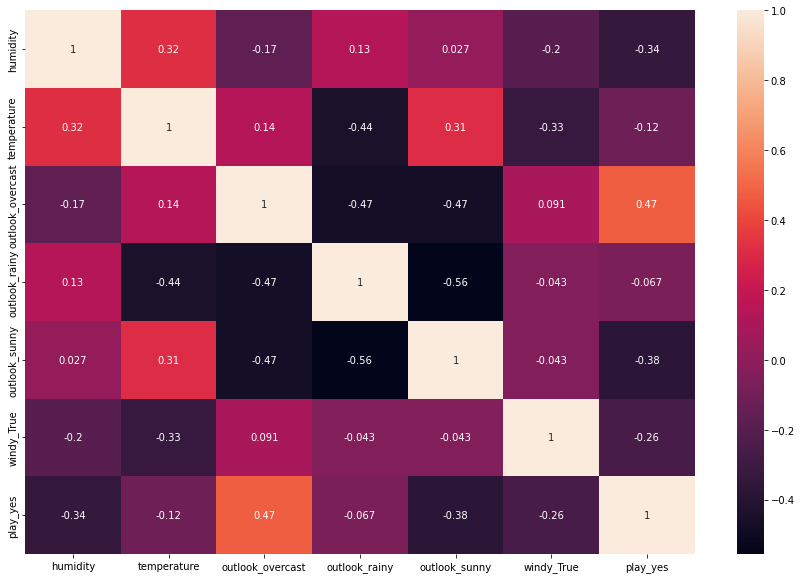

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr() , annot = True);

In [12]:
X = df.drop("humidity" , axis = 1)
y = df["humidity"]

## Train | Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.3 , random_state = 53)

## Scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(X_train)

MinMaxScaler()

In [18]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modeling

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(X_train , y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(X_test)

## Model Performance

In [23]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [24]:
r2 = r2_score(y_test , y_pred)
mae = mean_absolute_error(y_test , y_pred)
mse = mean_squared_error(y_test , y_pred)

print(f"Our model's r2 = {r2} , mae = {mae} , mse = {mse}")

Our model's r2 = -3.4363543595850308 , mae = 17.319012345678992 , mse = 394.6580838286844


## Backward Elimination

In [25]:
import statsmodels.api as sm

In [26]:
# X = np.append(arr = np.ones((len(df) , 1)).astype("int64") , values = df , axis = 1) # We add +1 intercept at 0.index column. I think we don't need that.
# X

In [82]:
X_list = df.iloc[:,[1,3]].values
X_list = np.array(X_list, dtype = "float")

In [83]:
X_list

array([[85.,  0.],
       [80.,  0.],
       [83.,  0.],
       [70.,  1.],
       [68.,  1.],
       [65.,  1.],
       [64.,  0.],
       [72.,  0.],
       [69.,  0.],
       [75.,  1.],
       [75.,  0.],
       [72.,  0.],
       [81.,  0.],
       [71.,  1.]])

In [84]:
y = df["humidity"]

In [85]:
model = sm.OLS(y , X_list).fit()

In [86]:
print(model.summary()) # Best r2 with 1. and 3. columns.

                                 OLS Regression Results                                
Dep. Variable:               humidity   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              482.6
Date:                Sat, 17 Sep 2022   Prob (F-statistic):                    3.43e-12
Time:                        09:15:45   Log-Likelihood:                         -50.802
No. Observations:                  14   AIC:                                      105.6
Df Residuals:                      12   BIC:                                      106.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\EmincanY\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
# Done